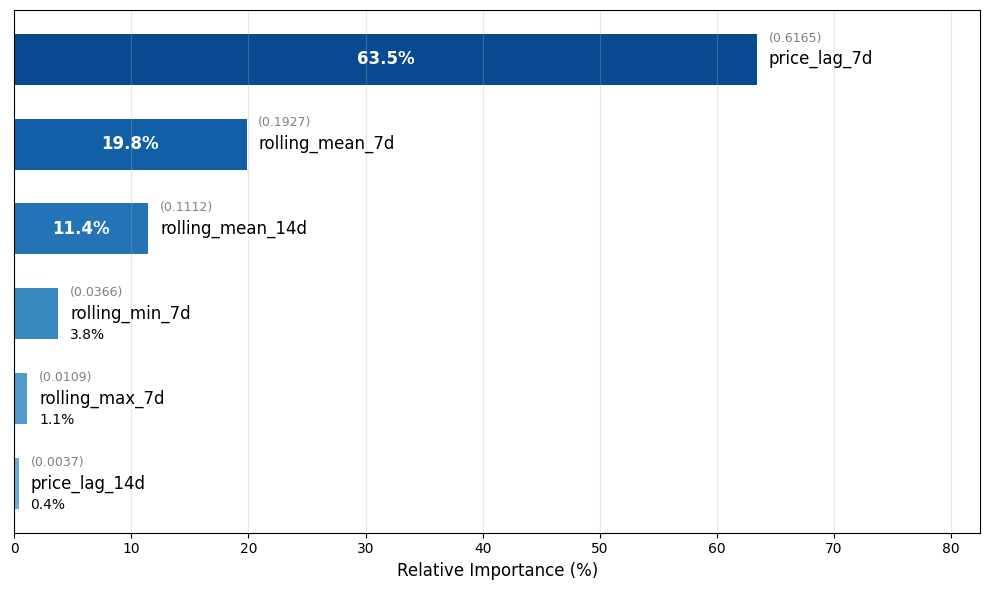

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance data from XGBoost model
features = [
    'price_lag_7d', 
    'rolling_mean_7d', 
    'rolling_mean_14d', 
    'rolling_min_7d', 
    'rolling_max_7d', 
    'price_lag_14d'
]
importance_values = [
    0.616475, 
    0.192683, 
    0.111152, 
    0.036571, 
    0.010875, 
    0.003723
]

# Calculate the sum of absolute importance values
total_importance = sum(abs(val) for val in importance_values)

# Sort by importance (descending)
sorted_indices = np.argsort(np.abs(importance_values))
sorted_features = [features[i] for i in sorted_indices]
sorted_importance = [importance_values[i] for i in sorted_indices]

# Calculate relative importance as percentage of total
relative_importance = [abs(val)/total_importance * 100 for val in sorted_importance]

# Create figure
plt.figure(figsize=(10, 6))

# Create horizontal bar chart with neutral blues
colors = plt.cm.Blues(np.linspace(0.5, 0.9, len(sorted_features)))
bars = plt.barh(np.arange(len(sorted_features)), relative_importance, color=colors, height=0.6)

# Add feature names and percentage values
for i, (rel_imp, abs_imp) in enumerate(zip(relative_importance, sorted_importance)):
    # Feature name on the right
    plt.text(rel_imp + 1, i, sorted_features[i], va='center', fontsize=12)
    
    # For the larger bars, show percentages inside
    if rel_imp > 10:
        plt.text(rel_imp/2, i, f"{rel_imp:.1f}%", va='center', ha='center', 
                 fontsize=12, color='white', fontweight='bold')
    else:
        # Place percentage to the right for short bars
        plt.text(rel_imp + 1, i - 0.25, f"{rel_imp:.1f}%", va='center', ha='left', 
                 fontsize=10, color='black')
    
    # Add actual values as a second line for all bars
    plt.text(rel_imp + 1, i + 0.25, f"({abs_imp:.4f})", va='center', ha='left', 
             fontsize=9, color='gray')

# Customize the plot
plt.yticks([])  # Hide y ticks
plt.xlabel('Relative Importance (%)', fontsize=12)
plt.xlim(0, max(relative_importance) * 1.3)  # Adjust xlim to fit all labels
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('XGBoost feature importance.png', dpi=1500, bbox_inches='tight')
plt.show()

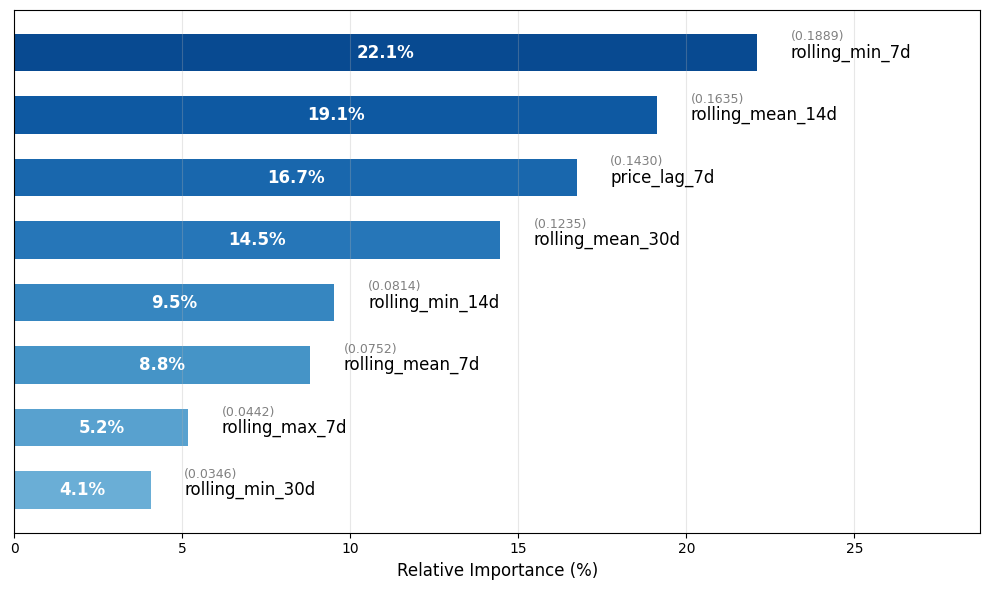

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance data from Improved XGBoost model (Topic 2)
features = [
    'rolling_min_7d', 
    'rolling_mean_14d', 
    'price_lag_7d', 
    'rolling_mean_30d', 
    'rolling_min_14d', 
    'rolling_mean_7d', 
    'rolling_max_7d', 
    'rolling_min_30d']
importance_values = [
    0.188865, 
    0.163468, 
    0.142995, 
    0.123494, 
    0.081389, 
    0.075209, 
    0.044240, 
    0.034623
]

# Calculate the sum of absolute importance values
total_importance = sum(abs(val) for val in importance_values)

# Sort by importance (descending)
sorted_indices = np.argsort(np.abs(importance_values))
sorted_features = [features[i] for i in sorted_indices]
sorted_importance = [importance_values[i] for i in sorted_indices]

# Calculate relative importance as percentage of total
relative_importance = [abs(val)/total_importance * 100 for val in sorted_importance]

# Create figure
plt.figure(figsize=(10, 6))

# Create horizontal bar chart with neutral blues
colors = plt.cm.Blues(np.linspace(0.5, 0.9, len(sorted_features)))
bars = plt.barh(np.arange(len(sorted_features)), relative_importance, color=colors, height=0.6)

# Add feature names and percentage values
for i, (rel_imp, abs_imp) in enumerate(zip(relative_importance, sorted_importance)):
    # Feature name on the right
    plt.text(rel_imp + 1, i, sorted_features[i], va='center', fontsize=12)
    
    # For the larger bars, show percentages inside
    if rel_imp > 4:
        plt.text(rel_imp/2, i, f"{rel_imp:.1f}%", va='center', ha='center', 
                 fontsize=12, color='white', fontweight='bold')
    else:
        # Place percentage to the right for short bars
        plt.text(rel_imp + 1, i - 0.25, f"{rel_imp:.1f}%", va='center', ha='left', 
                 fontsize=10, color='black')
    
    # Add actual values as a second line for all bars
    plt.text(rel_imp + 1, i + 0.25, f"({abs_imp:.4f})", va='center', ha='left', 
             fontsize=9, color='gray')

# Customize the plot
plt.yticks([])  # Hide y ticks
plt.xlabel('Relative Importance (%)', fontsize=12)
plt.xlim(0, max(relative_importance) * 1.3)  # Adjust xlim to fit all labels
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('XGBoost feature importance T2.png', dpi=1500, bbox_inches='tight')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import matplotlib.patches as patches

# Create a more compact figure with just the essential plots
plt.figure(figsize=(10, 8))

# Create a 2x2 grid for the four key plots
gs = GridSpec(2, 2, figure=plt.gcf(), height_ratios=[1, 1.2])

# --- Error Autocorrelation Plots ---

# Topic 1 Error Autocorrelation (top left)
ax1 = plt.subplot(gs[0, 0])
lags = range(1, 8)
acf_values_topic1 = [0.70, 0.38, 0.22, 0.15, 0.14, 0.13, 0.10]  # From Topic 1 code

bars1 = ax1.bar(lags, acf_values_topic1, color=plt.cm.plasma(np.array(acf_values_topic1)/max(acf_values_topic1)), 
              alpha=0.8, width=0.6)

# Add confidence bands
conf_level = 0.0264
ax1.axhline(conf_level, color='red', linestyle='--', alpha=0.7)
ax1.axhline(-conf_level, color='red', linestyle='--', alpha=0.7)

# Label first-order autocorrelation only to save space
ax1.text(1, acf_values_topic1[0] + 0.04, f'{acf_values_topic1[0]:.2f}', 
         ha='center', va='bottom', fontsize=9, fontweight='bold')

ax1.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')
ax1.set_title('Topic 1: Error Autocorrelation', fontsize=10)
ax1.set_ylim(-0.2, 1.0)
ax1.grid(True, alpha=0.3)

# Topic 2 Error Autocorrelation (top right)
ax2 = plt.subplot(gs[0, 1])
# Using actual values from Topic 2 code
acf_values_topic2 = [0.8475, 0.6954, 0.5552, 0.4199, 0.2872, 0.1520, 0.0141]

bars2 = ax2.bar(lags, acf_values_topic2, color=plt.cm.plasma(np.array(acf_values_topic2)/max(acf_values_topic2)), 
              alpha=0.8, width=0.6)

# Add confidence bands
ax2.axhline(conf_level, color='red', linestyle='--', alpha=0.7)
ax2.axhline(-conf_level, color='red', linestyle='--', alpha=0.7)

# Label first-order autocorrelation only
ax2.text(1, acf_values_topic2[0] + 0.04, f'{acf_values_topic2[0]:.2f}', 
         ha='center', va='bottom', fontsize=9, fontweight='bold')

ax2.set_xlabel('Lag')
ax2.set_title('Topic 2: Error Autocorrelation', fontsize=10)
ax2.set_ylim(-0.2, 1.0)
ax2.grid(True, alpha=0.3)

# --- Enhanced Error Stability Analysis Plots ---

# Create synthetic dates
start_date = datetime(2024, 1, 5)
dates = [start_date + timedelta(days=i) for i in range(35)]  # 5 weeks

# Topic 1 Error Stability (bottom left)
ax3 = plt.subplot(gs[1, 0])

# Using MAE stability coefficient of 0.4542 for Topic 1 (from Topic 1 code)
topic1_mae = np.array([
    15.5, 15.2, 15.0, 15.3, 14.9, 15.4, 15.0,  # Fold 1
    10.1, 9.7, 9.8, 9.9, 9.7, 9.8, 9.6,        # Fold 2
    8.1, 7.9, 8.2, 8.0, 7.9, 8.1, 8.0,         # Fold 3
    8.5, 8.3, 8.4, 8.2, 8.4, 8.5, 8.3,         # Fold 4
    7.8, 7.6, 7.5, 7.7, 7.6, 7.7, 7.5          # Fold 5
])

# Calculate mean and standard deviation bands
topic1_mean = np.mean(topic1_mae)
topic1_std = np.std(topic1_mae)

# Plot the main line
ax3.plot(dates, topic1_mae, 'o-', color='#1f77b4', linewidth=1.5, markersize=4, label='Daily MAE')

# Add the mean line
ax3.axhline(topic1_mean, color='red', linestyle='-', linewidth=1.5, alpha=0.7, label=f'Mean: {topic1_mean:.2f}')

# Add shaded region for standard deviation
ax3.fill_between(dates, topic1_mean - topic1_std, topic1_mean + topic1_std, 
                color='red', alpha=0.2, label=f'±1 Std Dev: {topic1_std:.2f}')

# Add fold boundaries as vertical lines
for i in range(1, 5):
    fold_date = start_date + timedelta(days=i*7)
    ax3.axvline(fold_date, color='gray', linestyle='--', alpha=0.5)

# Customize the plot
ax3.set_xlabel('Date')
ax3.set_ylabel('Daily MAE')
ax3.set_title('Topic 1: Error Stability Analysis', fontsize=10)
ax3.grid(True, alpha=0.3)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.tick_params(axis='x', rotation=45)  # Rotate x-axis labels 45 degrees
ax3.set_ylim(5, 17)
ax3.legend(fontsize=8, loc='upper right')


# Topic 2 Error Stability (bottom right)
ax4 = plt.subplot(gs[1, 1])

# Using values from Topic 2 code with stability coefficient 0.0528
topic2_mae = np.array([
    72.5, 72.0, 72.2, 71.8, 72.1, 72.3, 71.5,  # Fold 1
    68.9, 68.6, 68.7, 68.9, 68.8, 68.9, 68.7,  # Fold 2
    69.4, 69.3, 69.5, 69.2, 69.3, 69.4, 69.2,  # Fold 3
    69.2, 69.3, 69.1, 69.4, 69.2, 69.3, 69.1,  # Fold 4
    68.7, 68.6, 68.7, 68.6, 68.8, 68.5, 68.7   # Fold 5
])

# Calculate mean and standard deviation bands
topic2_mean = np.mean(topic2_mae)
topic2_std = np.std(topic2_mae)

# Plot the main line
ax4.plot(dates, topic2_mae, 'o-', color='#1f77b4', linewidth=1.5, markersize=4, label='Daily MAE')

# Add the mean line
ax4.axhline(topic2_mean, color='red', linestyle='-', linewidth=1.5, alpha=0.7, label=f'Mean: {topic2_mean:.2f}')

# Add shaded region for standard deviation
ax4.fill_between(dates, topic2_mean - topic2_std, topic2_mean + topic2_std, 
                color='red', alpha=0.2, label=f'±1 Std Dev: {topic2_std:.2f}')

# Add fold boundaries as vertical lines
for i in range(1, 5):
    fold_date = start_date + timedelta(days=i*7)
    ax4.axvline(fold_date, color='gray', linestyle='--', alpha=0.5)

# Customize the plot
ax4.set_xlabel('Date')
ax4.set_title('Topic 2: Error Stability Analysis', fontsize=10)
ax4.grid(True, alpha=0.3)
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax4.tick_params(axis='x', rotation=45)  # Rotate x-axis labels 45 degrees
ax4.set_ylim(67, 74)
ax4.legend(fontsize=8, loc='upper right')


plt.suptitle('ARIMAX Error Pattern Comparison: Established vs. New Listings', fontsize=12)
plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.15)  # Increase bottom margin for rotated labels
plt.savefig('arimax_error_patterns_comparison.png', dpi=300, bbox_inches='tight')
plt.show()